In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns
import ELOTools as et
import ELOVisuals as ev

In [2]:
map_results = pd.read_csv('Match Summary Data.csv', index_col=0)

In [3]:
map_results[(map_results['Team A'] == "HOU") | (map_results['Team B'] == "HOU")].head(100)

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-02-24,Hanamura,1,Assault,2459,BOS,HOU,Team B
1,2018-02-24,Lijiang Tower,2,KOTH,2459,BOS,HOU,Team B
2,2018-02-24,King's Row,3,Hybrid,2459,BOS,HOU,Team B
3,2018-02-24,Watchpoint: Gibraltar,4,Escort,2459,BOS,HOU,Team B
0,2018-02-23,Volskaya Industries,1,Assault,2386,HOU,LDN,Team B
1,2018-02-23,Nepal,2,KOTH,2386,HOU,LDN,Team A
2,2018-02-23,King's Row,3,Hybrid,2386,HOU,LDN,Team A
3,2018-02-23,Route 66,4,Escort,2386,HOU,LDN,Team B
4,2018-02-23,Ilios,5,KOTH,2386,HOU,LDN,Team A
0,2018-02-11,Dorado,1,Escort,2817,HOU,LDN,Team A


In [4]:
main_df = map_results.copy()
main_df['Match of the Day'] = map_results.copy()['Map Number']
main_df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner,Match of the Day
0,2018-02-25,Hanamura,1,Assault,2460,SHD,VAL,Tie,1
1,2018-02-25,Lijiang Tower,2,KOTH,2460,SHD,VAL,Team B,2
2,2018-02-25,King's Row,3,Hybrid,2460,SHD,VAL,Team B,3
3,2018-02-25,Watchpoint: Gibraltar,4,Escort,2460,SHD,VAL,Team B,4
0,2018-02-24,Hanamura,1,Assault,2459,BOS,HOU,Team B,1


In [5]:
elo_df = et.compute_elo_table(main_df)

In [6]:
elo_df.head()

,Date,Elo,Match Number,Team
0,2018-01-10,1000.0,0,BOS
1,2018-01-10,1000.0,0,DAL
2,2018-01-10,1000.0,0,GLA
3,2018-01-10,1000.0,0,NYE
4,2018-01-10,1000.0,0,PHI


In [7]:
team_a_list = set(map_results["Team A"].unique())
team_b_list = set(map_results["Team B"].unique())
team_list = list(team_a_list.union(team_b_list))
team_list

['BOS',
 'DAL',
 'GLA',
 'NYE',
 'PHI',
 'LDN',
 'VAL',
 'SHD',
 'SFS',
 'SEO',
 'FLA',
 'HOU']

In [8]:
team_elo_dfs = {}
for team in team_list:
    temp_elo_df = elo_df[elo_df["Team"]==team]
    team_elo_dfs[team] = temp_elo_df

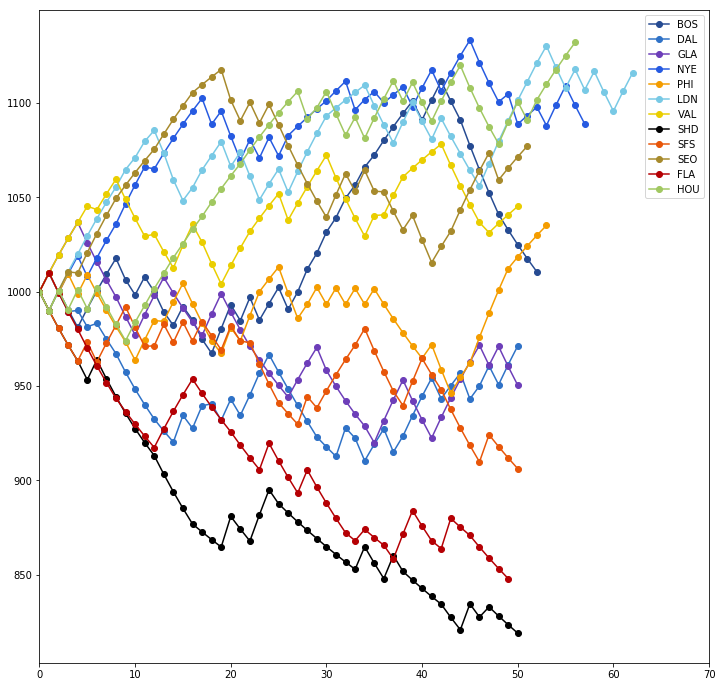

In [39]:
colors = {
    'LDN': '#78c9e5',
    'DAL': '#2f72c7',
    'SHD': '#000000',
    'SFS': '#e85609',
    'BOS': '#264b92',
    'PHI': '#f49d00',
    'SEO': '#a78a2c',
    'NYE': '#265ae1',
    'FLA': '#b50004',
    'VAL': '#eace00',
    'HOU': '#a1c861',
    'GLA': '#6d3eb9'
}
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['Match Number'], value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,70])
plt.legend()
plt.show()

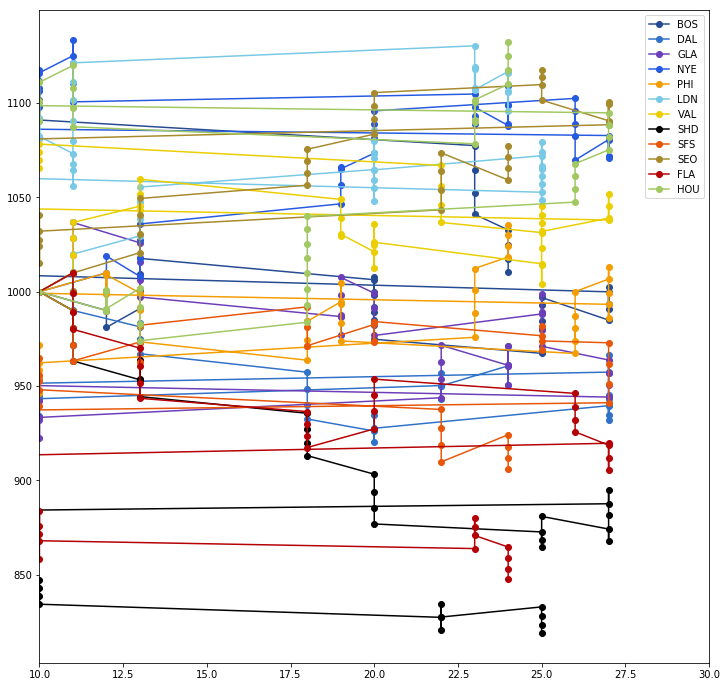

In [10]:
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['Date'].str[-2:].astype(int), value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([10,30])
plt.legend()
plt.show()

In [11]:
test_str = '2018-01-11'

In [12]:
new_str = test_str[:-2] + str(int(test_str[-2:])-1)
new_str

'2018-01-10'

In [13]:
elo_df.sort_values(by='Match Number', ascending=False).reset_index(drop=True).iloc[0]['Match Number']

62

## Try out the map-style break down.

In [14]:
KOTH_df = main_df[main_df['Map Type'] == 'KOTH']

In [15]:
KOTH_elo = et.compute_elo_table(KOTH_df)

In [16]:
team_elo_KOTH = {}
for team in team_list:
    temp_elo_df = KOTH_elo[KOTH_elo["Team"]==team]
    team_elo_KOTH[team] = temp_elo_df

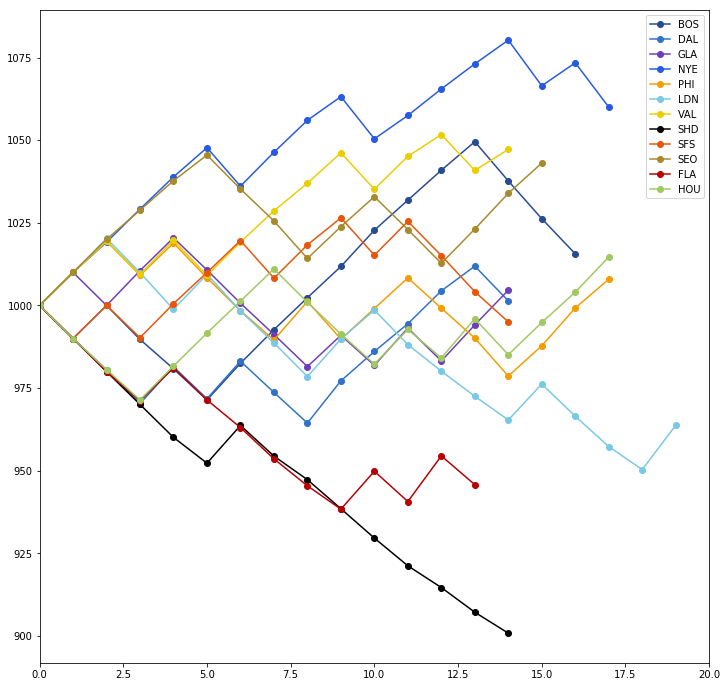

In [17]:
colors = {
    'LDN': '#78c9e5',
    'DAL': '#2f72c7',
    'SHD': '#000000',
    'SFS': '#e85609',
    'BOS': '#264b92',
    'PHI': '#f49d00',
    'SEO': '#a78a2c',
    'NYE': '#265ae1',
    'FLA': '#b50004',
    'VAL': '#eace00',
    'HOU': '#a1c861',
    'GLA': '#6d3eb9'
}
plt.figure(figsize=(12,12))
for key, value in team_elo_KOTH.items():
    plt.plot(value['Match Number'], value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,20])
plt.legend()
plt.show()

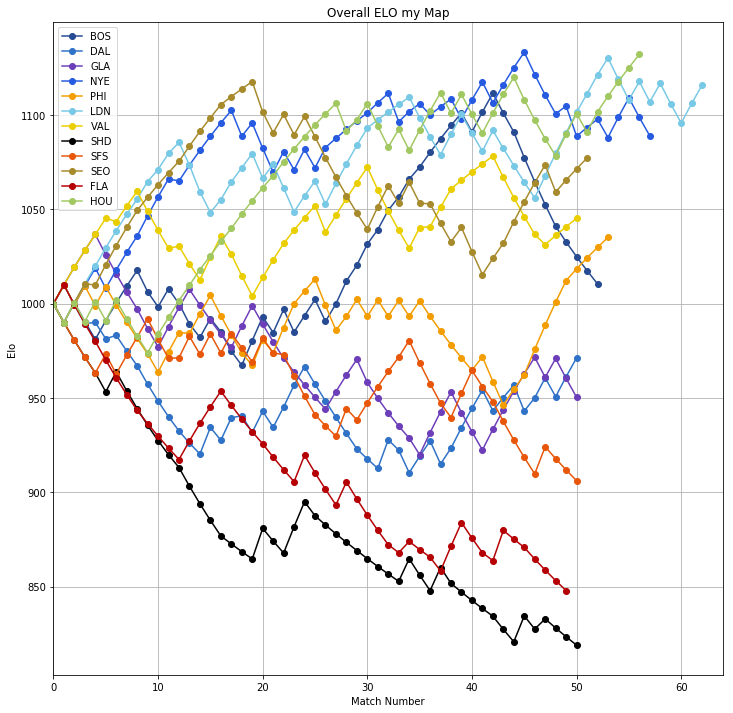

In [18]:
ev.plot_elo_by_match(elo_df, title="Overall ELO my Map")

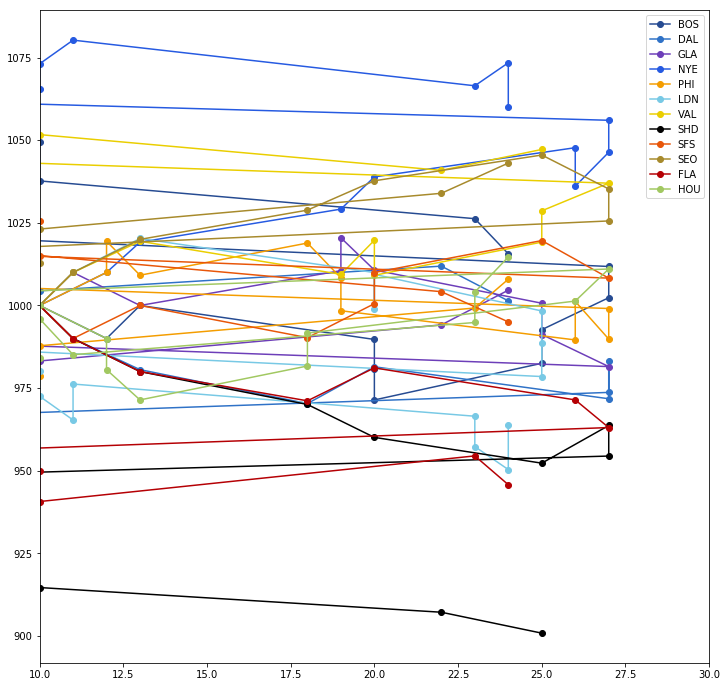

In [19]:
plt.figure(figsize=(12,12))
for key, value in team_elo_KOTH.items():
    plt.plot(value['Date'].str[-2:].astype(int), value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([10,30])
plt.legend()
plt.show()

In [20]:
import ELOVisuals as ev

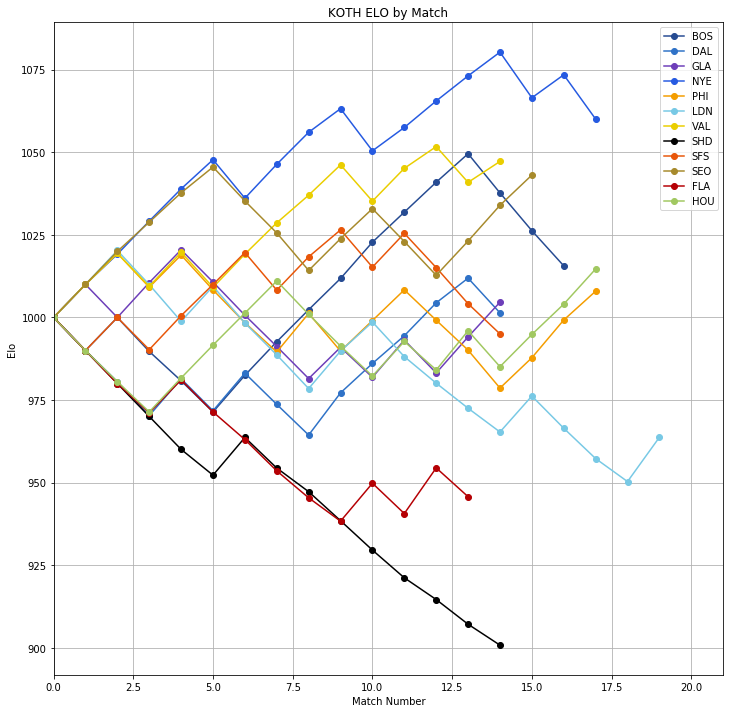

In [21]:
ev.plot_elo_by_match(KOTH_elo, title="KOTH ELO by Match")

In [22]:
for team in team_list:
    print("{}: {}".format(team, et.get_current_elo(KOTH_elo, team, "2018-02-11")))

BOS: 1037.6954767638038
DAL: 1004.4325090368682
GLA: 983.2036548819651
NYE: 1080.3021137256785
PHI: 987.805524564608
LDN: 976.2257535324034
VAL: 1051.712447299421
SHD: 914.6361858616152
SFS: 1015.0902559539636
SEO: 1023.127243783551
FLA: 940.6626572459697
HOU: 985.1061773501526


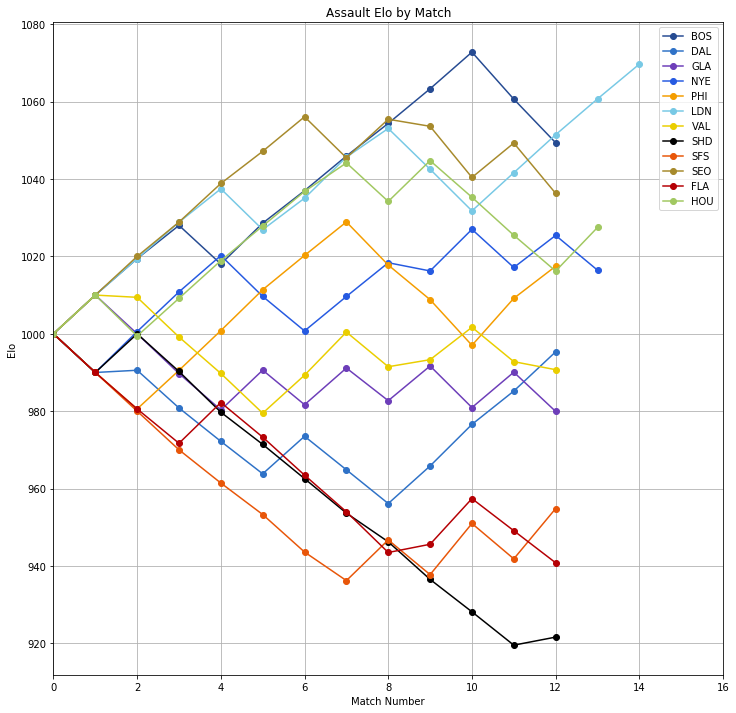

In [23]:
Assault_df = main_df[main_df['Map Type'] == 'Assault']
Assault_elo = et.compute_elo_table(Assault_df)
ev.plot_elo_by_match(Assault_elo, title="Assault Elo by Match")

In [24]:
for team in team_list:
    print("{}: {}".format(team, et.get_current_elo(Assault_elo, team, "2018-02-01")))

BOS: 1036.9868075348832
DAL: 964.8462223839921
GLA: 991.1504169245119
NYE: 1000.7404979848328
PHI: 1017.7703389216914
LDN: 1035.048041632865
VAL: 1000.438371888179
SHD: 962.5609051649235
SFS: 936.2143018143616
SEO: 1056.0851620289764
FLA: 953.9917681073224
HOU: 1044.1671656134602


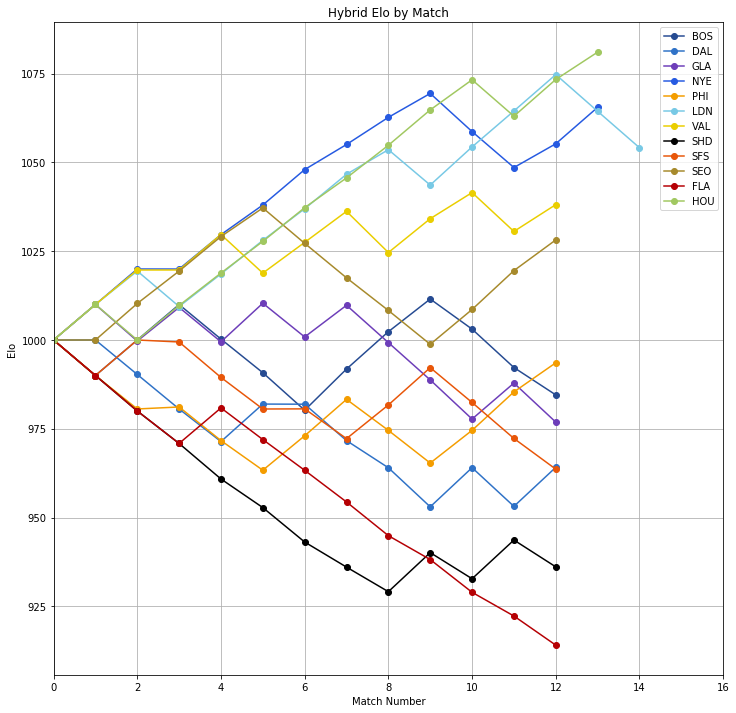

In [25]:
Assault_df = main_df[main_df['Map Type'] == 'Hybrid']
Hybrid_elo = et.compute_elo_table(Assault_df)
ev.plot_elo_by_match(Hybrid_elo, "Hybrid Elo by Match")

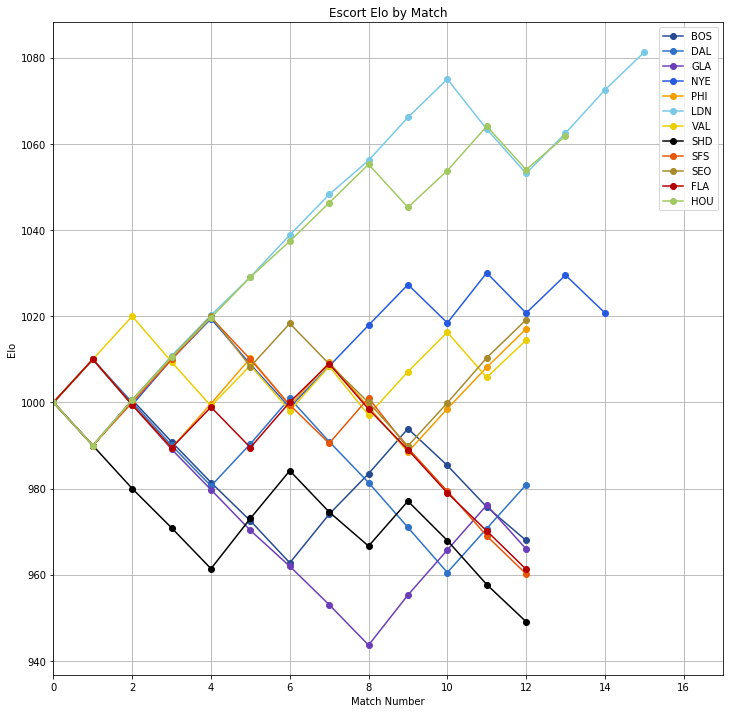

In [26]:
Assault_df = main_df[main_df['Map Type'] == 'Escort']
Escort_elo = et.compute_elo_table(Assault_df)
ev.plot_elo_by_match(Escort_elo, "Escort Elo by Match")

In [27]:
escort_elo_list = []
for team in team_list:
    escort_elo_list.append([team, et.get_current_elo(Escort_elo, team, "2018-02-10")])
current_escort_elo_df = pd.DataFrame(escort_elo_list, columns=["Team", "Elo"])
current_escort_elo_df.head()

,Team,Elo
0,BOS,985.372735
1,DAL,960.525179
2,GLA,965.755288
3,NYE,1018.460719
4,PHI,998.522794


In [28]:

current_escort_elo_df = current_escort_elo_df.sort_values(by="Elo",ascending=False).reset_index(drop=True)
current_escort_elo_df.head(12)

,Team,Elo
0,LDN,1075.029399
1,HOU,1053.805437
2,NYE,1018.460719
3,VAL,1016.286120
4,SEO,999.885802
5,PHI,998.522794
6,BOS,985.372735
7,SFS,979.417754
8,FLA,978.991120
9,SHD,967.947653


## Single Team Graph

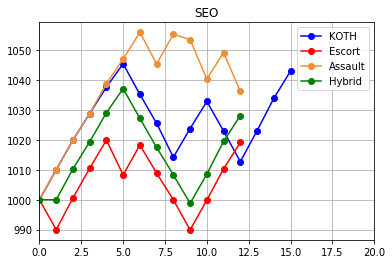

In [40]:
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == 'SEO']
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == 'SEO']
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == 'SEO']
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == 'SEO']
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,20])
plt.legend()
plt.title('SEO')
plt.grid()
plt.show()

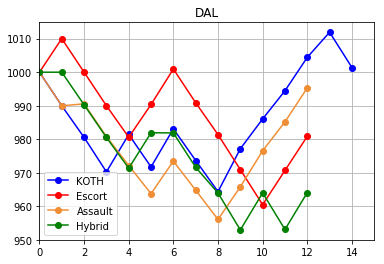

In [30]:
plot_team = "DAL"
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,15])
plt.legend()
plt.title(plot_team)
plt.grid()
plt.show()

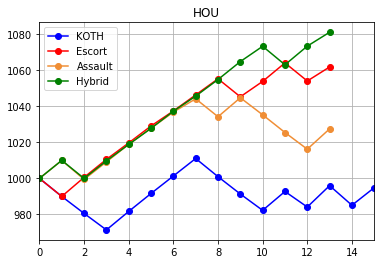

In [31]:
plot_team = "HOU"
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,15])
plt.legend()
plt.title(plot_team)
plt.grid()
plt.show()

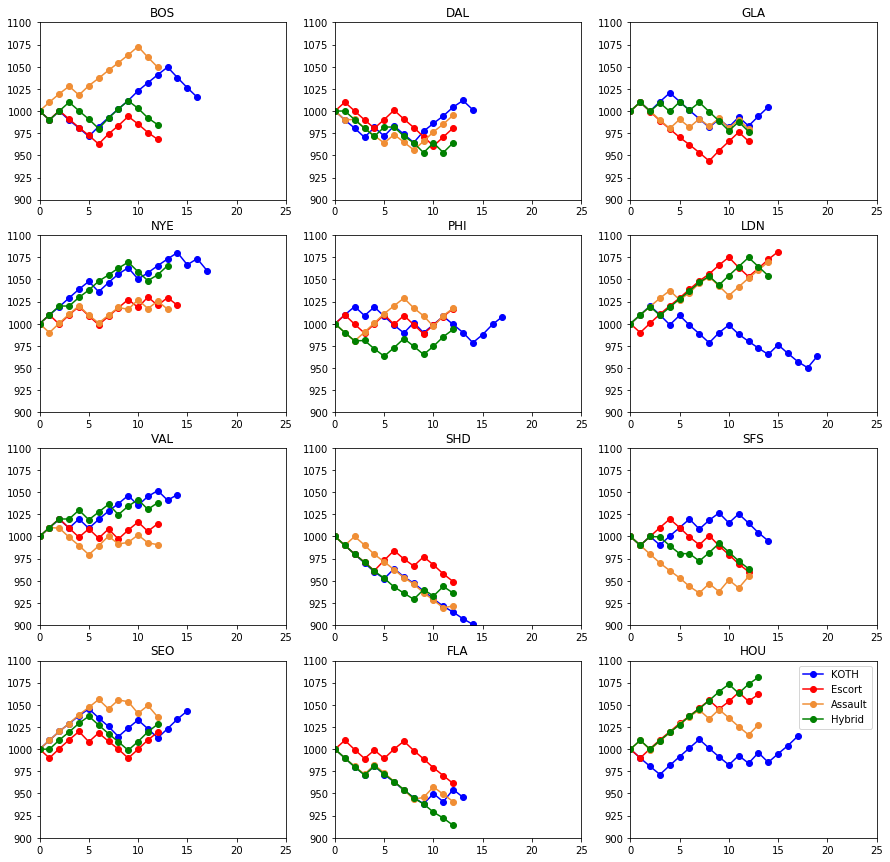

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
i=0

for plot_team in team_list:
    ax=axes[i//3,i%3 ]
    SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
    ax.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
    SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
    ax.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
    SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
    ax.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
    SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
    ax.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
    ax.set_xlim([0,25])
    ax.set_ylim([900, 1100])
    #ax.legend()
    ax.set_title(plot_team)
    i +=1
plt.legend()
plt.savefig('team_plots.png')
#plt.show()

## Test resampling

In [33]:
new_elo_df = et.reindex_elo_by_date(elo_df)

In [34]:
import matplotlib
from datetime import datetime

In [35]:
new_elo_df["DateTime"] = new_elo_df["Date"].apply(lambda x: matplotlib.dates.date2num(datetime.strptime(x, '%Y-%m-%d')))

In [36]:
new_team_elo_dfs = {}
for team in team_list:
    temp_elo_df = new_elo_df[new_elo_df["Team"]==team]
    new_team_elo_dfs[team] = temp_elo_df

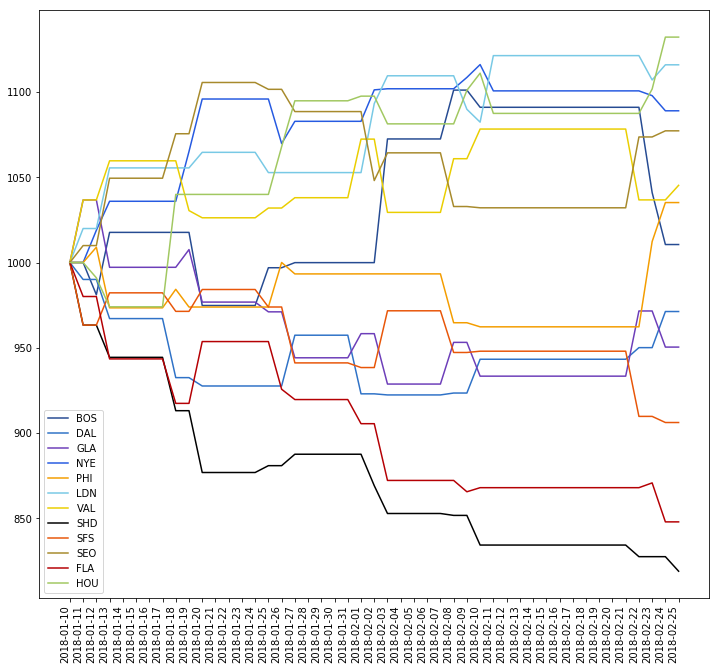

In [37]:
plt.figure(figsize=(12,12))
for key, value in new_team_elo_dfs.items():
    plt.plot(value['Date'], value['Elo'], label=key, color=colors[key])
plt.xlim()
plt.gcf().autofmt_xdate()
plt.xticks(rotation='90')
plt.legend()
plt.show()

In [38]:
new_elo_df

,Date,Elo,Match Number,Team,DateTime
0,2018-01-10,1000.000000,0,BOS,736704.0
0,2018-01-11,1000.000000,0,BOS,736705.0
0,2018-01-12,981.085825,4,BOS,736706.0
0,2018-01-13,1017.675001,8,BOS,736707.0
0,2018-01-14,1017.675001,8,BOS,736708.0
0,2018-01-15,1017.675001,8,BOS,736709.0
0,2018-01-16,1017.675001,8,BOS,736710.0
0,2018-01-17,1017.675001,8,BOS,736711.0
0,2018-01-18,1017.675001,8,BOS,736712.0
0,2018-01-19,1017.675001,8,BOS,736713.0
